In [1]:
from nearline_helpers import *

Welcome to JupyROOT 6.26/10


In [2]:
f1 = r.TFile('../bin/drop.root')
t1 = f1.Get('tree')
f2 = r.TFile('../bin/nodrop.root')
t2 = f2.Get('tree')

In [7]:
def plot_waveform(wf,ax=None):
    if(ax is None):
        fig,ax = plt.subplots()
    else:
        fig = plt.gcf()
    plt.sca(ax)
        
    trace = np.array(wf.trace)
    samples = range(len(trace))
    peak_location = samples[list(trace).index(np.amax(trace))]
    ped = np.full_like(samples, wf.pedestalLevel)
    plt.plot(samples,trace,color='C0')
    plt.plot([peak_location, peak_location], [wf.pedestalLevel, np.amax(trace)], ':', color='xkcd:grey')
    plt.plot(samples,ped, color='C2')
    plt.fill_between(samples, ped-wf.pedestalStdev, ped+wf.pedestalStdev, alpha=0.2, color='C2')
    title = f'Run/Subrun: {wf.runNum}/{wf.subRunNum}\nAMC Number: {wf.amcNum}\nChannel: {wf.channelTag}\nEvent: {wf.eventNum}'
    plt.legend(title=title)
    # plt.show()
    return fig,ax

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

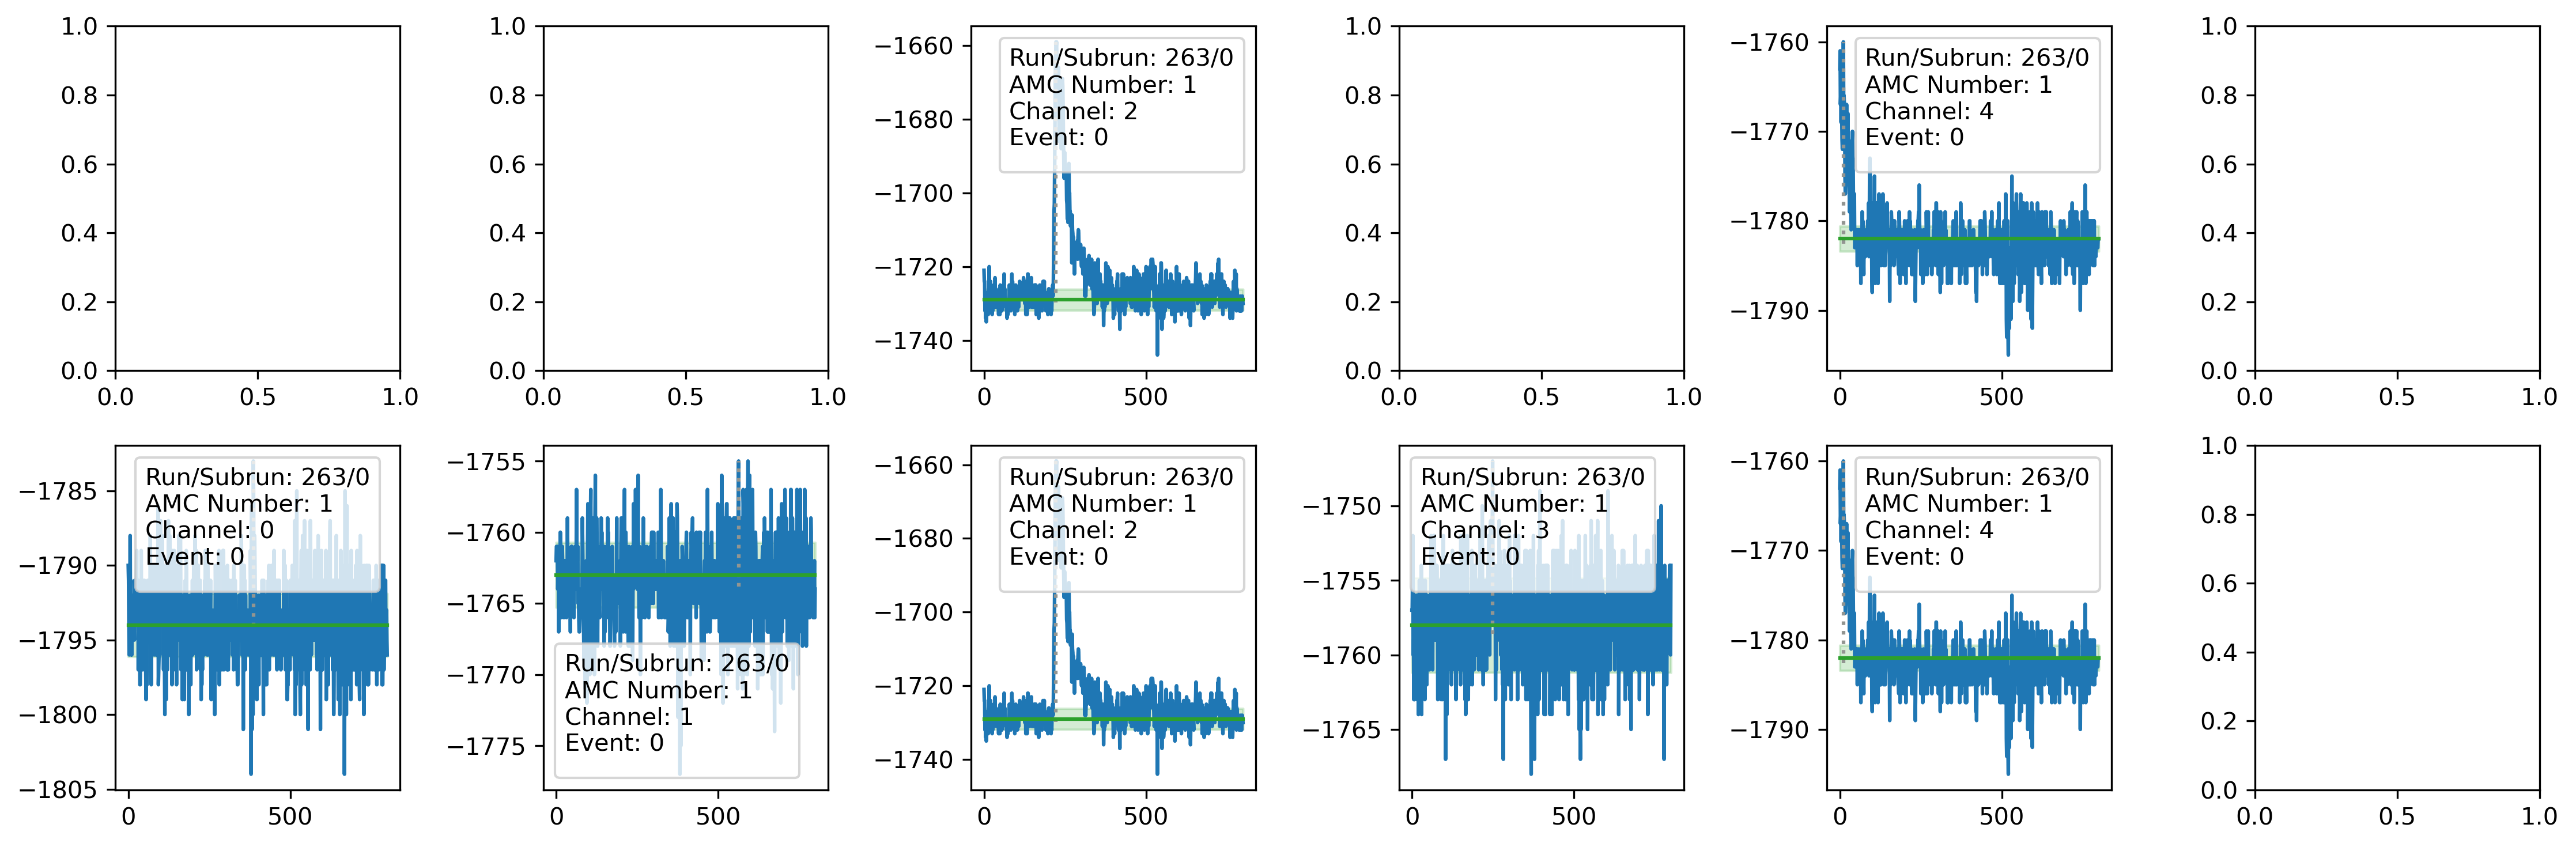

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


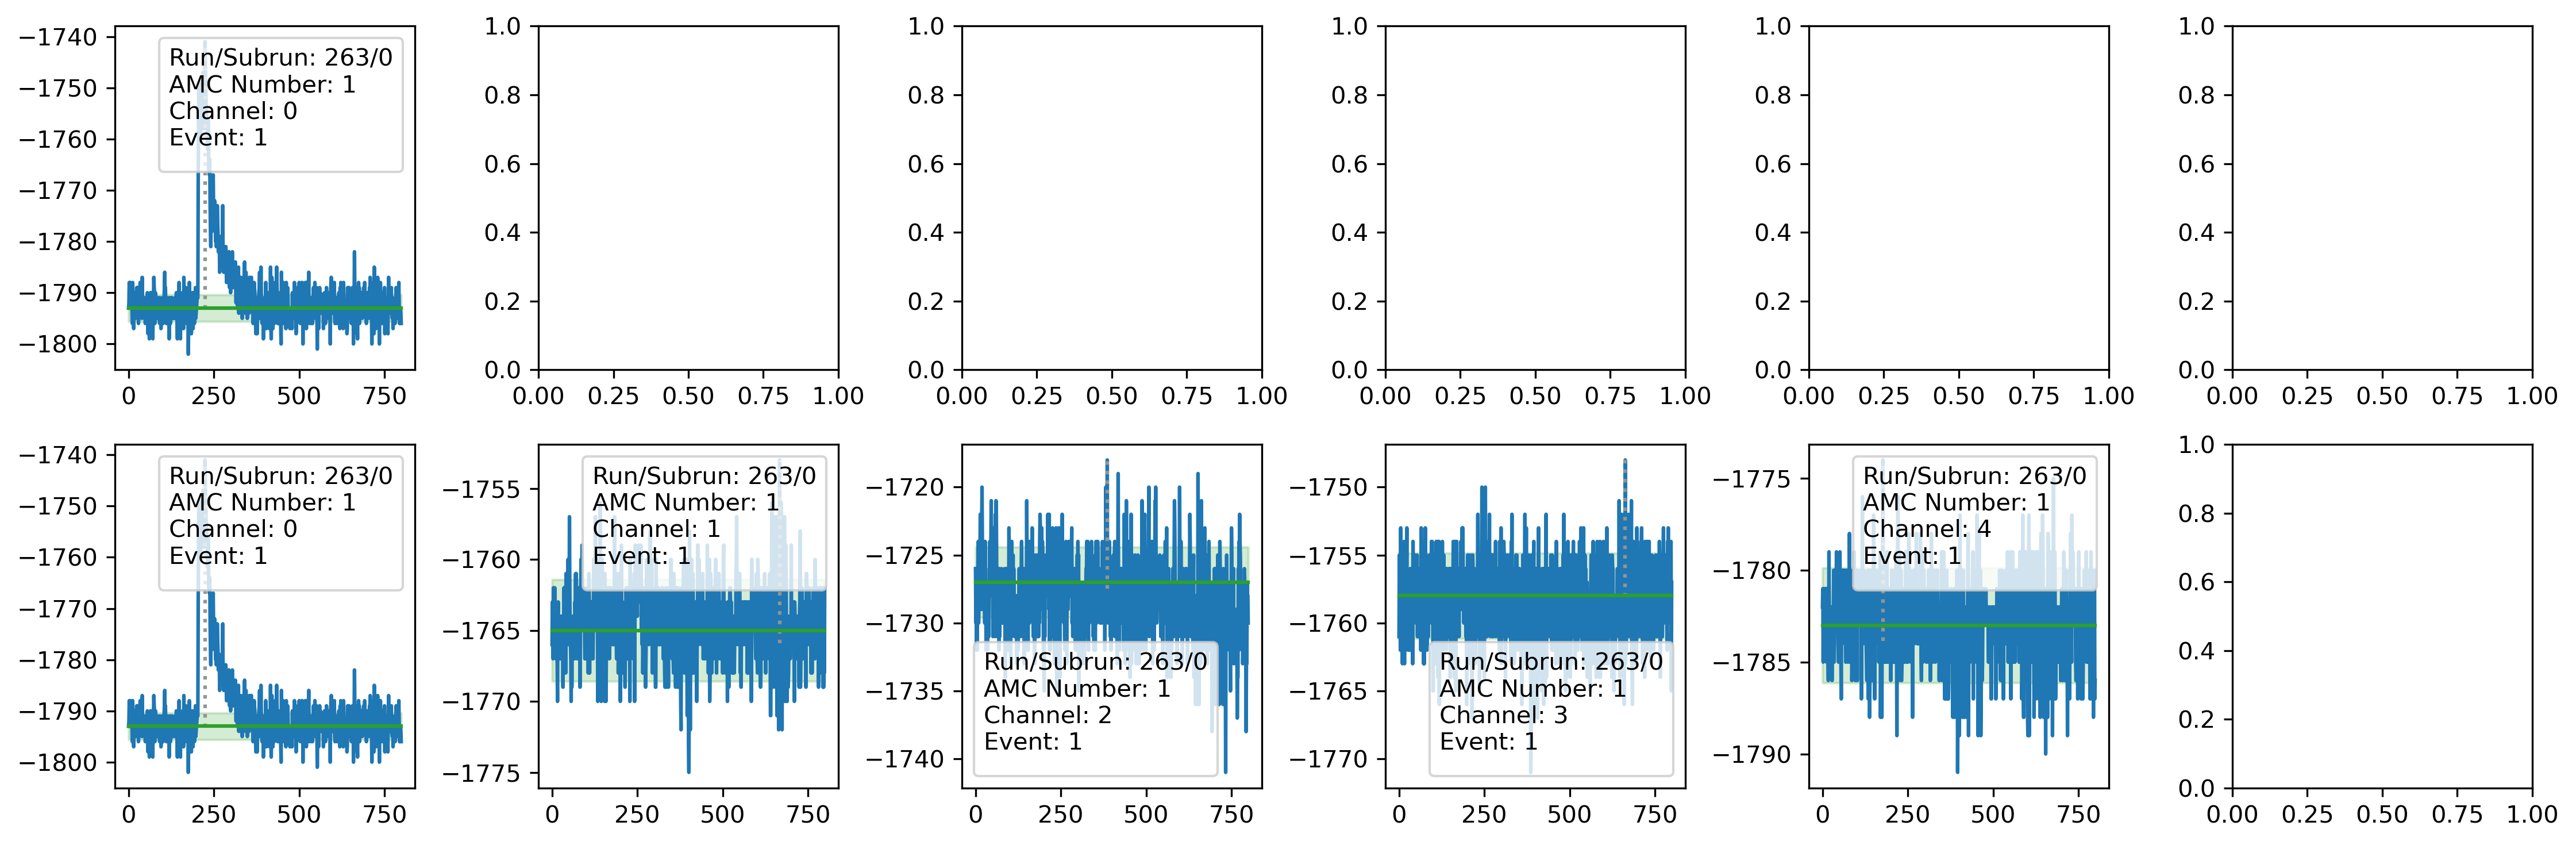

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


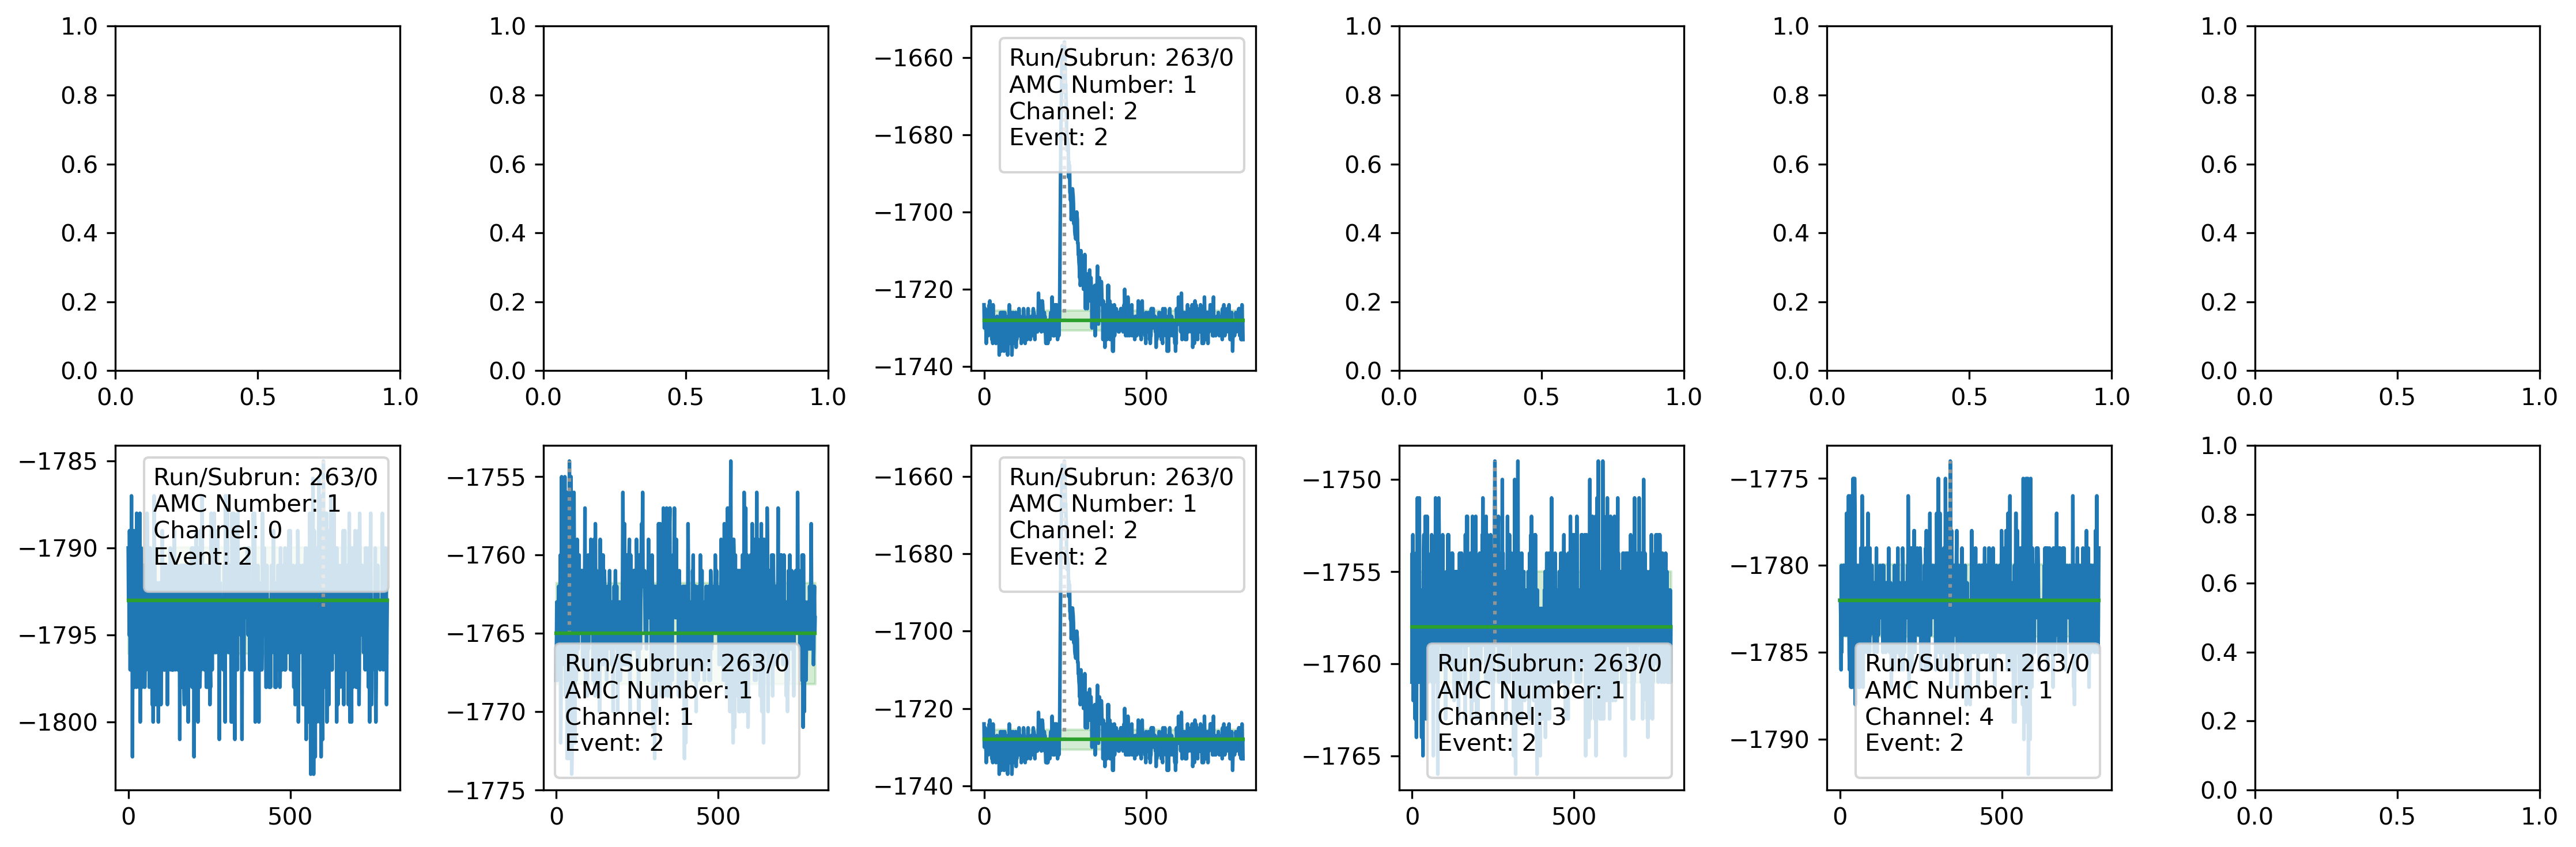

In [12]:
for entry in range(3):
    t1.GetEntry(entry)
    t2.GetEntry(entry)

    wf1 = t1.waveforms
    wf2 = t2.waveforms

    fig,ax = plt.subplots(2,6,figsize=(15,5), dpi=300)
    for i, wfi in enumerate(wf1):
        if wfi.amcNum != 1:
            continue
        axi = ax[0,wfi.channelTag]
        plot_waveform(wfi, ax=axi)
    for i, wfi in enumerate(wf2):
        if wfi.amcNum != 1:
            continue
        axi = ax[1,wfi.channelTag]
        plot_waveform(wfi, ax=axi)
    plt.tight_layout()
    plt.show()